In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/Asteroid_Normalized.csv')
data

,a,e,i,om,w,q,ad,per_y,H,pha,diameter,albedo,rot_per,GM,BV,UB,moid,n,per,ma
0,0.354908,0.213852,0.083238,0.393319,0.996385,0.379566,0.229142,0.259400,0.091219,0.0,0.533248,0.270352,0.010200,NaN,0.494970,0.543925,0.256055,0.136087,0.259400,0.784363
1,0.324537,0.227253,0.229741,0.385161,0.666141,0.350354,0.211422,0.232195,0.013615,0.0,0.926577,0.264221,0.004392,NaN,0.486922,0.521495,0.227563,0.154294,0.232195,0.239430
2,0.316424,0.258977,0.085688,0.721104,0.403507,0.331006,0.213728,0.225067,0.000000,0.0,1.000000,0.272965,0.004309,NaN,0.553320,0.680374,0.197683,0.159643,0.225067,0.390052
3,0.279029,0.174932,0.091367,0.308065,0.792483,0.335571,0.167190,0.192983,0.066712,0.0,0.737689,0.222111,0.007799,NaN,0.613682,0.689720,0.204244,0.187472,0.192983,0.541344
4,0.316486,0.137375,0.086519,0.191436,0.017794,0.381443,0.183041,0.225121,0.052417,0.0,0.950734,0.113568,0.003054,NaN,0.559356,0.702804,0.258631,0.159601,0.225121,0.769072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24363,0.308267,0.116138,0.063671,0.716155,0.952911,0.383182,0.172365,0.217959,0.693669,0.0,0.008184,0.355779,NaN,NaN,NaN,NaN,0.254284,0.165251,0.217959,0.477225
24364,0.313748,0.167089,0.065494,0.034126,0.549054,0.366897,0.188709,0.222728,0.714091,0.0,0.006280,0.418090,NaN,NaN,NaN,NaN,0.236695,0.161456,0.222728,0.370383
24365,0.376055,0.259840,0.161207,0.826406,0.196702,0.374582,0.256923,0.278815,0.618788,0.0,0.037268,0.038191,NaN,NaN,NaN,NaN,0.252686,0.124890,0.278815,0.165555
24366,0.364056,0.313769,0.090133,0.169786,0.754505,0.341206,0.263239,0.267752,0.625596,0.0,0.014599,0.267337,NaN,NaN,NaN,NaN,0.206996,0.131107,0.267752,0.399286


In [89]:
sel_data1 = data[['q', 'H', 'diameter', 'a', 'i', 'ad', 'n', 'per']]
sel_data1 = sel_data1.dropna()

sel_data1

,q,H,diameter,a,i,ad,n,per
0,0.379566,0.091219,0.533248,0.354908,0.083238,0.229142,0.136087,0.259400
1,0.350354,0.013615,0.926577,0.324537,0.229741,0.211422,0.154294,0.232195
2,0.331006,0.000000,1.000000,0.316424,0.085688,0.213728,0.159643,0.225067
3,0.335571,0.066712,0.737689,0.279029,0.091367,0.167190,0.187472,0.192983
4,0.381443,0.052417,0.950734,0.316486,0.086519,0.183041,0.159601,0.225121
...,...,...,...,...,...,...,...,...
24363,0.383182,0.693669,0.008184,0.308267,0.063671,0.172365,0.165251,0.217959
24364,0.366897,0.714091,0.006280,0.313748,0.065494,0.188709,0.161456,0.222728
24365,0.374582,0.618788,0.037268,0.376055,0.161207,0.256923,0.124890,0.278815
24366,0.341206,0.625596,0.014599,0.364056,0.090133,0.263239,0.131107,0.267752


In [4]:
from keras.models import Sequential
from keras.layers import Dense

2024-07-22 16:36:49.476729: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [90]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sel_data1, test_size=0.2, random_state=42)

X_train = train_df.drop(columns=['diameter'])
y_train = train_df['diameter']

X_test = test_df.drop(columns=['diameter'])
y_test = test_df['diameter']


In [95]:
classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'relu'))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [97]:
classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325 (1.27 KB)

 Trainable params: 325 (1.27 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
history = classifier.fit(train_df.astype(float).drop(columns = ['diameter']), train_df.astype(float)['diameter'], batch_size = 32, epochs = 20)

Epoch 1/20


610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7804e-04
Epoch 2/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.4690e-04
Epoch 3/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.5541e-04
Epoch 4/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7328e-04
Epoch 5/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6687e-04
Epoch 6/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.8770e-04
Epoch 7/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.4105e-04
Epoch 8/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.6137e-04
Epoch 9/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.8638e-04
Epoch 10/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9352e-04
Epoch 11/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9108e-04
Epoch 12/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.5970e-04
Epoch 13/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.8946e-04
Epoch 14/20
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.3281e-04
Epoch 15/20


In [169]:
yhat_test = classifier.predict(test_df.drop(columns = ['diameter']))
yhat_test

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


array([[0.03512561],
       [0.05076573],
       [0.05433395],
       ...,
       [0.01212105],
       [0.03636147],
       [0.0131825 ]], dtype=float32)

In [170]:
y_test = test_df['diameter'].astype(float)
y_test

8648     0.031905
21091    0.042926
5953     0.088167
17805    0.012179
3503     0.047271
           ...   
8195     0.020358
7107     0.017120
9129     0.015907
13829    0.027199
18391    0.015326
Name: diameter, Length: 4874, dtype: float64

In [173]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, yhat_test)
print("Neural-MSE",mse)

#Calculating training MSE
yhat_train = classifier.predict(train_df.drop(columns = ['diameter']))
mse_train = mean_squared_error(train_df['diameter'], yhat_train)
print("Training-MSE",mse_train)


Neural-MSE 0.0006946875054968872
610/610 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training-MSE 0.0007307523983123436


In [138]:
#print y_test and yhat_test next to each other
y_test_pred = pd.DataFrame({'y_test':y_test, 'yhat_test':yhat_test.flatten()}).sort_values(by='y_test', ascending=False)
y_test_pred[:15]

,y_test,yhat_test
218,0.844986,0.696619
34,0.841347,0.616372
35,0.831715,0.669447
44,0.826036,0.576020
167,0.795369,0.763377
69,0.774270,0.609027
75,0.771087,0.589709
509,0.735559,0.681064
245,0.723124,0.572785
133,0.716915,0.474025


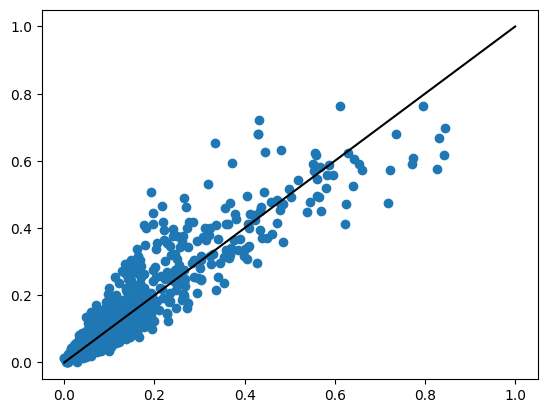

In [142]:
#Graph for y_test and yhat_test with labels
plt.scatter(y_test, yhat_test)
#draw a line at 45 deg angle
plt.plot([0, 1], [0, 1], color = 'black')

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
import keras_tuner as kt
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from keras.optimizers import Adam

In [122]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for i in range(hp.Int("num_layers", 3, 6)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation=hp.Choice("activation", ["relu"]),))

    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-4, 1e-5, 1e-6]))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

In [123]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    overwrite=True,
    project_name='asteroid'
)

In [124]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 6, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 1e-05, 1e-06], 'ordered': True}


In [125]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, batch_size=32)

Trial 5 Complete [00h 00m 59s]
val_mean_squared_error: 0.0007978464127518237

Best val_mean_squared_error So Far: 0.0007978464127518237
Total elapsed time: 00h 04m 53s


In [146]:
tuner.results_summary()

Results summary
Results in my_dir/asteroid
Showing 10 best trials
Objective(name="val_mean_squared_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 5
units_0: 96
activation: relu
units_1: 96
units_2: 192
learning_rate: 1e-05
units_3: 256
units_4: 96
units_5: 256
Score: 0.0007978464127518237

Trial 3 summary
Hyperparameters:
num_layers: 4
units_0: 160
activation: relu
units_1: 96
units_2: 256
learning_rate: 1e-05
units_3: 160
units_4: 96
units_5: 32
Score: 0.0008115388918668032

Trial 2 summary
Hyperparameters:
num_layers: 6
units_0: 192
activation: relu
units_1: 256
units_2: 32
learning_rate: 1e-05
units_3: 32
units_4: 32
units_5: 32
Score: 0.0008128292975015938

Trial 0 summary
Hyperparameters:
num_layers: 4
units_0: 224
activation: relu
units_1: 256
units_2: 256
learning_rate: 0.0001
units_3: 32
Score: 0.0008207532810047269

Trial 1 summary
Hyperparameters:
num_layers: 3
units_0: 256
activation: relu
units_1: 160
units_2: 224
learning_rate: 1e-06
units_3: 128
Sc

In [148]:
best = tuner.get_best_hyperparameters()[0]
best.values

{'num_layers': 5,
 'units_0': 96,
 'activation': 'relu',
 'units_1': 96,
 'units_2': 192,
 'learning_rate': 1e-05,
 'units_3': 256,
 'units_4': 96,
 'units_5': 256}

In [149]:
model1 = tuner.hypermodel.build(best)

In [150]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 96)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 96)             │         9,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 192)            │        18,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 96)             │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,881 (401.88 KB)

 Trainable params: 102,881 (401.88 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
model1.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 2/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 3/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 4/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/50
549/549 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.00

In [156]:
yhat1 = model1.predict(X_test)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [157]:
mse = mean_squared_error(y_test, model1.predict(X_test))
mse

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.0006861756863212038

In [167]:
y_check = pd.DataFrame({'y_test':y_test, 'yhat1':yhat1.flatten()}).sort_values(by='y_test', ascending=False)
y_check[-15:]

,y_test,yhat1
23301,0.006330,0.006331
5561,0.006235,0.008330
9366,0.006149,0.004456
18231,0.005749,0.001232
9798,0.005092,0.000000
1796,0.004511,0.000000
3673,0.003508,0.000000
8757,0.003198,0.000000
4978,0.003182,0.001821
15579,0.003057,0.000000


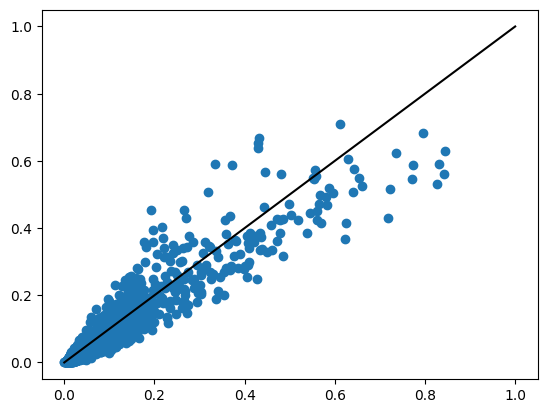

In [161]:
#Graph for y_test and yhat_test with labels
plt.scatter(y_test, yhat1)
#draw a line at 45 deg angle
plt.plot([0, 1], [0, 1], color = 'black')